# Custom sorting of plot series

In [7]:
import pandas as pd
import numpy as np
from plotnine import *
from pandas.api.types import CategoricalDtype

elem = pd.read_csv("../examples/data/elements.csv")

%matplotlib inline

In [8]:
from plotnine.data import mpg

## Bar plot of manufacturer - Ordered by count 

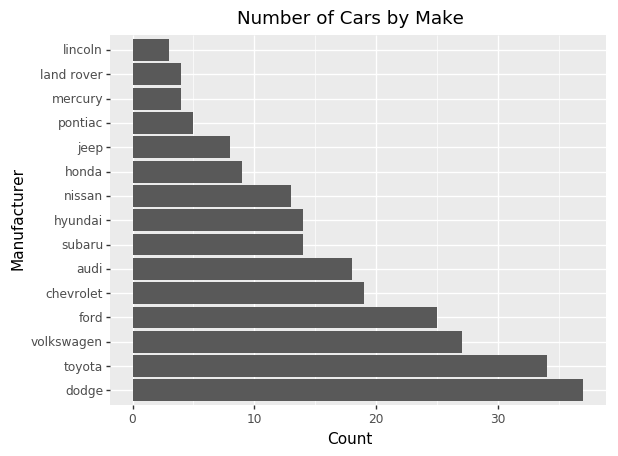

<ggplot: (124925313628)>

In [12]:
# Create a list of models with the number of counts of each
manufacturer_counts = mpg["manufacturer"].value_counts()

# Create a list of manufacturers, the order of manufacturer's 
#   in this list will be the order in the final plot.
manufacturer_list = list(manufacturer_counts.index)

# Create a new *ordered* category type based from this list
from pandas.api.types import CategoricalDtype
manufacturer_cats = CategoricalDtype(categories = manufacturer_list,
                                                  ordered = True)

# Cast the existing categories into the new category, it seems
#   we need to do this via a string, otherwise it silently fails. 
mpg["manufacturer_categorised"] = mpg["manufacturer"].astype(str).astype(manufacturer_cats)

# Finally create the plot
(ggplot(mpg) +
     aes(x = 'manufacturer_categorised') +
     geom_bar(size = 20) +
     coord_flip() + 
     ggtitle('Number of Cars by Make') + 
     labs(y = "Count", x = "Manufacturer")
)

We could also modify the **existing manufacturer category** to set it as ordered instead of having to create a new CategoricalDtype and apply that to the data. 

~~~~
mpg["manufacturer_categorised"] = mpg["manufacturer"]\
    .cat.reorder_categories(manufacturer_list, ordered = True )
~~~~


## Bar plot of manufacturer - Default Output

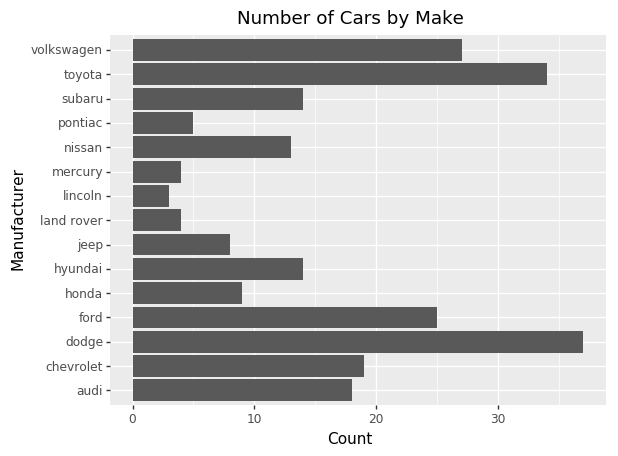

<ggplot: (-9223371911929425064)>

In [11]:
(ggplot(mpg) +
     aes(x = 'manufacturer') +
     geom_bar(size = 20) +
     coord_flip() + 
     ggtitle('Number of Cars by Make') + 
     labs(y = "Count", x = "Manufacturer")
)

## Explanation

By default plotnine will order the series axis labels alphabetically, and while this is a good default there are often occasions where it is desirable to change this. 

Plotnine respects the ordered categorical dtype of pandas which enables us to override the order of axes.

### Further Reading
Pandas documentation of how to use categorical data in practice.
> https://pandas.pydata.org/pandas-docs/stable/categorical.html

Pandas API Reference for categorical.
>  http://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical

Pandas documentation of pd.Categorical.
> http://pandas.pydata.org/pandas-docs/version/0.15.2/generated/pandas.core.categorical.Categorical.html

Example from has2k1 (Plotnine Dev)
> https://github.com/has2k1/plotnine/issues/94
